In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('spam.tsv', sep='\t') 
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [7]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [8]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df['label'].value_counts() / len(df)

label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

In [11]:
ham = df [df['label'] == 'ham']
print(ham)

     label                                            message  length  punct
0      ham  Go until jurong point, crazy.. Available only ...     111      9
1      ham                      Ok lar... Joking wif u oni...      29      6
3      ham  U dun say so early hor... U c already then say...      49      6
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2
6      ham  Even my brother is not like to speak with me. ...      77      2
...    ...                                                ...     ...    ...
5565   ham                                       Huh y lei...      12      3
5568   ham               Will ü b going to esplanade fr home?      36      1
5569   ham  Pity, * was in mood for that. So...any other s...      57      7
5570   ham  The guy did some bitching but I acted like i'd...     125      1
5571   ham                         Rofl. Its true to its name      26      1

[4825 rows x 4 columns]


In [12]:
spam = df[df['label'] == 'spam']
print(spam)

     label                                            message  length  punct
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
5     spam  FreeMsg Hey there darling it's been 3 week's n...     147      8
8     spam  WINNER!! As a valued network customer you have...     157      6
9     spam  Had your mobile 11 months or more? U R entitle...     154      2
11    spam  SIX chances to win CASH! From 100 to 20,000 po...     136      8
...    ...                                                ...     ...    ...
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...      90      3
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     158      5
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...     160      8
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...     147      3
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8

[747 rows x 4 columns]


In [14]:
df.isna()

,label,message,length,punct
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5567,False,False,False,False
5568,False,False,False,False
5569,False,False,False,False
5570,False,False,False,False


In [15]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [16]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [17]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


Executing df[‘label’].value_counts() again

In [19]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

Using Ham label

In [25]:
ham = df[df['label'] == 'ham']
print(ham)

     label                                            message  length  punct  \
0      ham  Go until jurong point, crazy.. Available only ...     111      9   
1      ham                      Ok lar... Joking wif u oni...      29      6   
3      ham  U dun say so early hor... U c already then say...      49      6   
4      ham  Nah I don't think he goes to usf, he lives aro...      61      2   
6      ham  Even my brother is not like to speak with me. ...      77      2   
...    ...                                                ...     ...    ...   
5565   ham                                       Huh y lei...      12      3   
5568   ham               Will ü b going to esplanade fr home?      36      1   
5569   ham  Pity, * was in mood for that. So...any other s...      57      7   
5570   ham  The guy did some bitching but I acted like i'd...     125      1   
5571   ham                         Rofl. Its true to its name      26      1   

      ham spam  
0     ham  ham  
1    

Using Spam label


In [26]:
spam = df[df['label'] == 'spam']
print(spam)

     label                                            message  length  punct  \
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6   
5     spam  FreeMsg Hey there darling it's been 3 week's n...     147      8   
8     spam  WINNER!! As a valued network customer you have...     157      6   
9     spam  Had your mobile 11 months or more? U R entitle...     154      2   
11    spam  SIX chances to win CASH! From 100 to 20,000 po...     136      8   
...    ...                                                ...     ...    ...   
5537  spam  Want explicit SEX in 30 secs? Ring 02073162414...      90      3   
5540  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     158      5   
5547  spam  Had your contract mobile 11 Mnths? Latest Moto...     160      8   
5566  spam  REMINDER FROM O2: To get 2.50 pounds free call...     147      3   
5567  spam  This is the 2nd time we have tried 2 contact u...     160      8   

      ham spam  
2     ham  ham  
5    

Checking both class of variables: ham, spam

In [27]:
ham.shape, spam.shape

((4825, 6), (747, 6))

Hardcoding ham to have the same size

In [28]:
ham = ham.sample(spam.shape[0])

In [29]:
ham.shape, spam.shape

((747, 6), (747, 6))

Appending spam to ham and ignoring index making it true
Note: function append() is deprecated; instead was replace by concat()


In [37]:
data = pd.concat([ham, spam], ignore_index=True)
print(data)

     label                                            message  length  punct  \
0      ham                                  10 min later k...      17      3   
1      ham  One of the joys in lifeis waking up each daywi...     127      3   
2      ham  Can't take any major roles in community outrea...      62      2   
3      ham  Well I wasn't available as I washob nobbing wi...     107      3   
4      ham              I need you to be in my strong arms...      37      3   
...    ...                                                ...     ...    ...   
1489  spam  Want explicit SEX in 30 secs? Ring 02073162414...      90      3   
1490  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...     158      5   
1491  spam  Had your contract mobile 11 Mnths? Latest Moto...     160      8   
1492  spam  REMINDER FROM O2: To get 2.50 pounds free call...     147      3   
1493  spam  This is the 2nd time we have tried 2 contact u...     160      8   

      ham spam  
0     ham  ham  
1    

In [38]:
data.shape

(1494, 6)

In [39]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [40]:
data.head()

,label,message,length,punct,ham,spam
0,ham,10 min later k...,17,3,ham,ham
1,ham,One of the joys in lifeis waking up each daywi...,127,3,ham,ham
2,ham,Can't take any major roles in community outrea...,62,2,ham,ham
3,ham,Well I wasn't available as I washob nobbing wi...,107,3,ham,ham
4,ham,I need you to be in my strong arms...,37,3,ham,ham


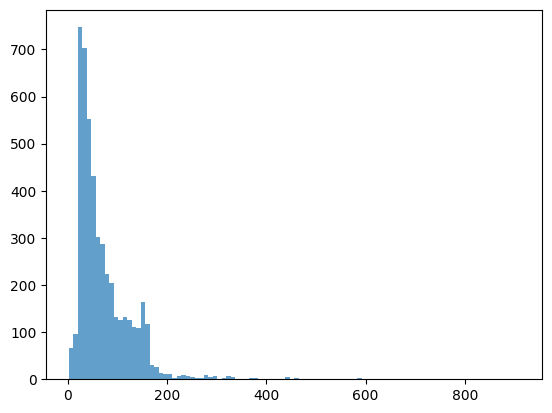

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('spam.tsv', sep='\t')
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']
data = pd.concat([ham, spam], ignore_index=True)
plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.show()

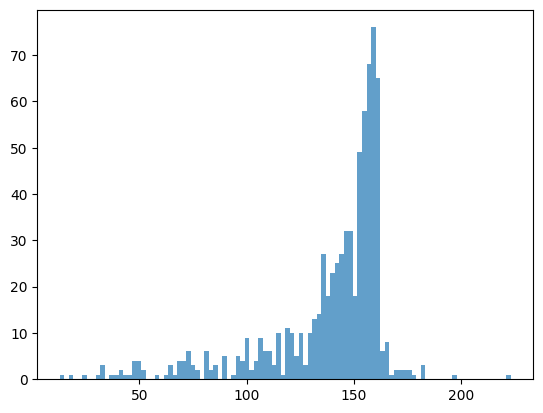

In [ ]:
plt.hist(data[data['label'] == 'spam']['length'], bins=100, alpha=0.7)
plt.show()

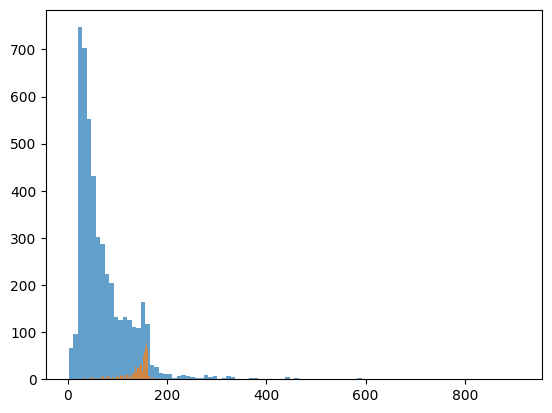

In [14]:
plt.hist(data[data['label'] == 'ham']['length'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins=100, alpha=0.7)
plt.show()

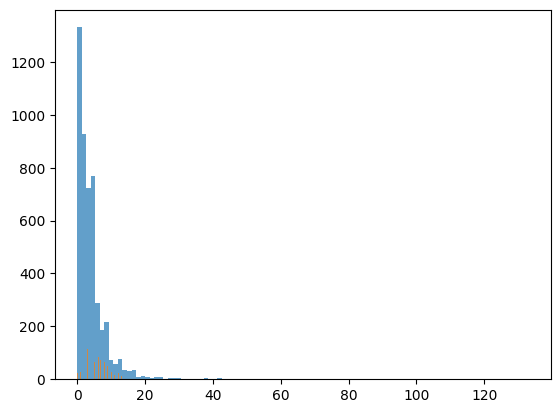

In [15]:
plt.hist(data[data['label'] == 'ham'] ['punct'], bins=100, alpha=0.7)
plt.hist(data[data['label'] == 'spam'] ['punct'], bins=100, alpha=0.7)
plt.show() 


In [16]:
data

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,ham,U dun say so early hor... U c already then say...,49,6
3,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
4,ham,Even my brother is not like to speak with me. ...,77,2
...,...,...,...,...
5567,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5568,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5569,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5570,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

In [19]:
5572 * 0.3

1671.6

In [20]:
X_train.shape

(3900,)

In [21]:
X_test.shape

(1672,)

Building the Model (Random Forest)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('spam.tsv', sep='\t')
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']
data = pd.concat([spam], ignore_index=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [32]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [33]:
y_pred = classifier.predict(X_test)

In [21]:
y_test, y_pred

(258    spam
 521    spam
 14     spam
 31     spam
 505    spam
        ... 
 267    spam
 362    spam
 501    spam
 310    spam
 200    spam
 Name: label, Length: 225, dtype: object,
 array(['spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam',
        'spam', 'spam',

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [23]:
accuracy_score(y_test, y_pred)

1.0

In [24]:
1 * 1672

1672

In [34]:
confusion_matrix(y_test, y_pred)

array([[1470,    0],
       [  39,  163]])

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1470
        spam       1.00      0.81      0.89       202

    accuracy                           0.98      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.98      0.98      1672



Building the Model (Support Vector Machine)

In [36]:
from sklearn.svm import SVC

In [37]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [38]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

Predicting the result (SVM)


In [42]:
y_pred = svm.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.8791866028708134

In [47]:
confusion_matrix(y_test, y_pred)

array([[1470,    0],
       [ 202,    0]])

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.88      1.00      0.94      1470
        spam       0.00      0.00      0.00       202

    accuracy                           0.88      1672
   macro avg       0.44      0.50      0.47      1672
weighted avg       0.77      0.88      0.82      1672



/home/kemuy/wrk/Spam/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kemuy/wrk/Spam/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kemuy/wrk/Spam/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
